# Predict the House Price

![](https://camo.githubusercontent.com/1721729c963e9c92788c73c8e1d38661cf377eed/68747470733a2f2f7777772e7265616c657374617465636f6e73756c74696e672e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31322f424d49466561747572652d57686572652d4172652d57652d496e2d486f7573696e672d4379636c652e706e67)

__imports__

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import Data

The data for the problem are in the files: [housePrM.txt](http://faculty.chicagobooth.edu/jeffrey.russell/teaching/bstats/problems/data/housePrM.txt)

- column 2 is the price of the house in thousands of dollars
- and column 3 is the size in hundreds of square feet.


In [2]:
house = pd.read_table("http://faculty.chicagobooth.edu/jeffrey.russell/teaching/bstats/problems/data/housePrM.txt")
house.head()

,Value,Price,Square_Footage,Number_Bedrooms
0,119.37,121.87,20.5,4.0
1,148.93,150.25,22.0,4.0
2,130.39,122.78,15.9,3.0
3,135.70,144.35,18.6,3.0
4,126.30,116.20,12.1,2.0


> (a) Plot price vs size. Do you see a linear relationship?

Plot size and price as a scatter plot

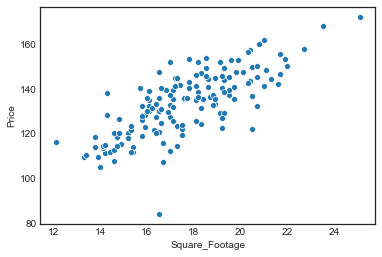

In [7]:
sns.scatterplot(x='Square_Footage', y='Price', data=house)

Plot size and price as a scatter plot (with the regression line)

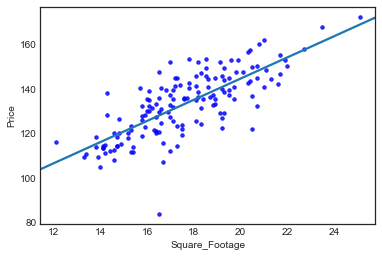

In [11]:
sns.regplot(x = 'Square_Footage', y='Price', data = house, 
           ci = None, scatter_kws={'color':'b', 's':12})

__There appears to be a linear relationship between `SqFt` and `Price`. The relationship appears ot be moderately strong and positive indicating and the size of the house increase so does Priec increase as well.__

Note there does appear to be an outlier around 16.5 SqFt. We can look at that as we go in my analysis of our assumption to the linear model.

>(b) Obtain the equation of the line regression fits to the data.
Plot the regression fitted line on the scatterplot.
What price do you predict for a house with size 20 ?

Next we will create the regression model and print out the accompany regression output.

In [5]:
house_model = smf.ols(formula='Price ~ Square_Footage', data = house).fit()
print(house_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           8.96e-30
Time:                        19:17:20   Log-Likelihood:                -549.58
No. Observations:                 150   AIC:                             1103.
Df Residuals:                     148   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         49.5015      5.881      8.

#### Interpreting the Regression Model Output
- __Intercept__ the can see `Intercept = 49.5` which indicates if there was a house that had `square_footage = 0`, the average price of the home would be 49.5 dollars for those homes. Since there isnt homes with 0 sqft, this interpretaiton of the intercept is not practically meaningful. 

- __Slope__ we can see `sqft = 4.76` which indicates as the price of the house increases by a unit of 1, the sqft of the house increases by 4.76 on average.

### Prediction
Next we will use the `hosue_model` to predict for a house with a size 20. 

In [12]:
house_model.predict({'Square_Footage':[20]})

0    144.685026
dtype: float64

In [23]:
house_model.get_prediction({'Square_Footage':[20]}).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,144.685026,1.121929,142.467956,146.902096,125.774499,163.595553


We would predict that a house with a square footage of 20 would be $144

> (c) Do you notice anything unusual in the scatterplot ?

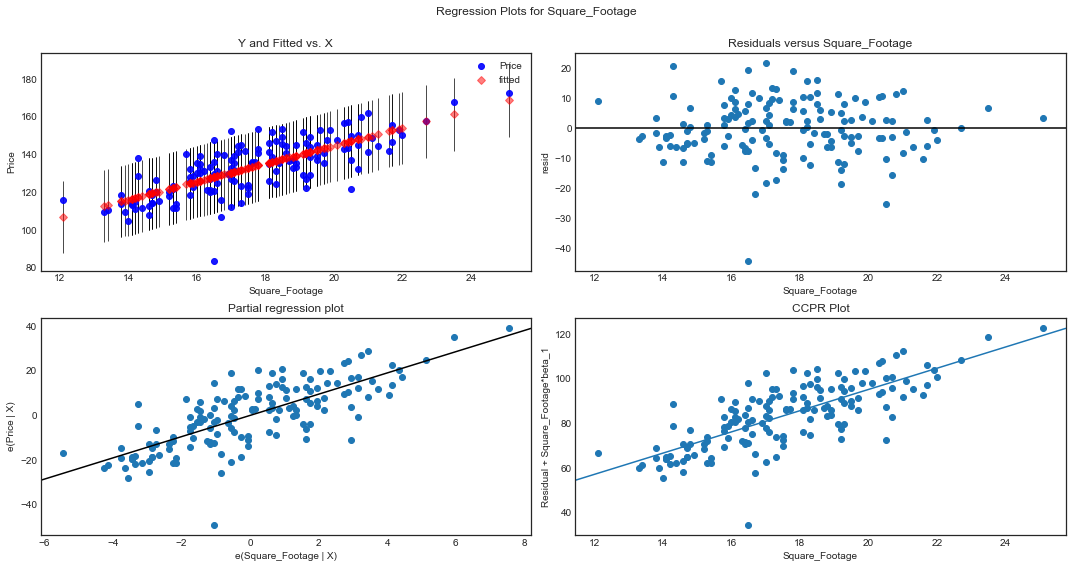

In [15]:
# plot regression results
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(house_model, "Square_Footage", fig=fig)

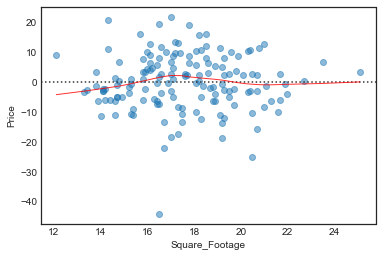

In [16]:
sns.residplot('Square_Footage', 'Price', data=house, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

There appears to be an outlier around 16.5 Squaer_Footage

> (d)Obtain the correlation between the size and price.
Square it.
Compare this value to the "R-sq" value on the regression output.

In [18]:
corr_matrix = house.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price              1.000000
Value              0.841245
Square_Footage     0.762435
Number_Bedrooms    0.606388
Name: Price, dtype: float64

In [19]:
house_model.rsquared

0.5813063707434907

When we compare the correlation value between size and price we get 0.76 and for the r-sq value in the model we get 0.58

We can also plot the correlation between the features using `sns.heatmap`

Text(0.5,1,'Correlation between different features')

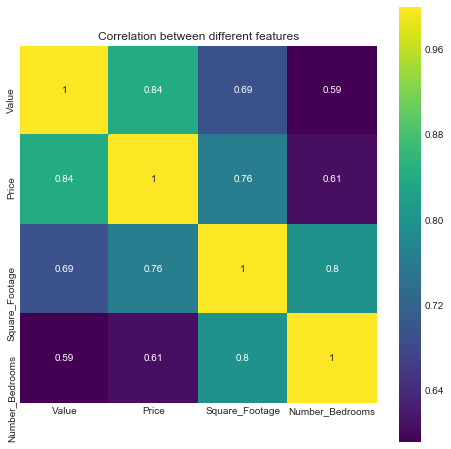

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different features')